<a href="https://colab.research.google.com/github/mitaaaa164/CODE-SL-UL/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Load Dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Buat DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['label'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 2. Normalisasi Data (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 3. Buat Model Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

In [ ]:
# 4. Fit dan Prediksi Klaster
clusters = model.fit_predict(X_scaled)

# Tambahkan hasil cluster ke DataFrame
df['cluster'] = clusters
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
# 5. Evaluasi Kinerja
from sklearn.metrics import adjusted_rand_score, silhouette_score

ari = adjusted_rand_score(y, clusters)
silhouette = silhouette_score(X_scaled, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Adjusted Rand Index (ARI): 0.6153
Silhouette Score: 0.4467


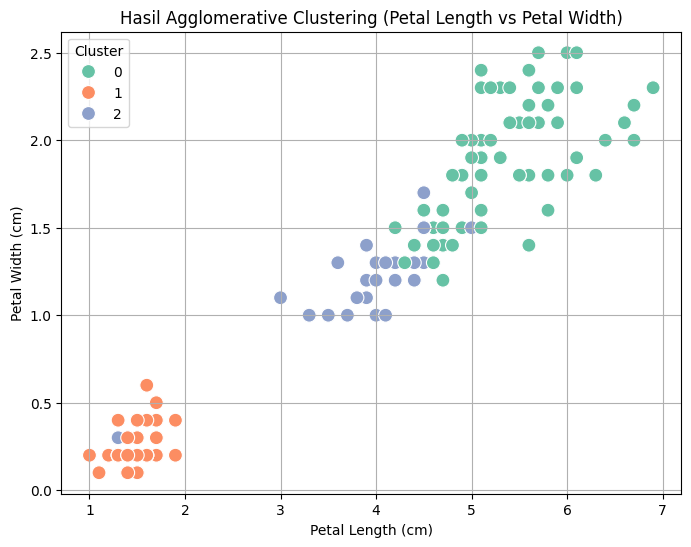

In [ ]:
# 6a. Visualisasi Scatter Plot (Petal Length vs Petal Width)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['cluster'], palette='Set2', s=100)
plt.title("Hasil Agglomerative Clustering (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

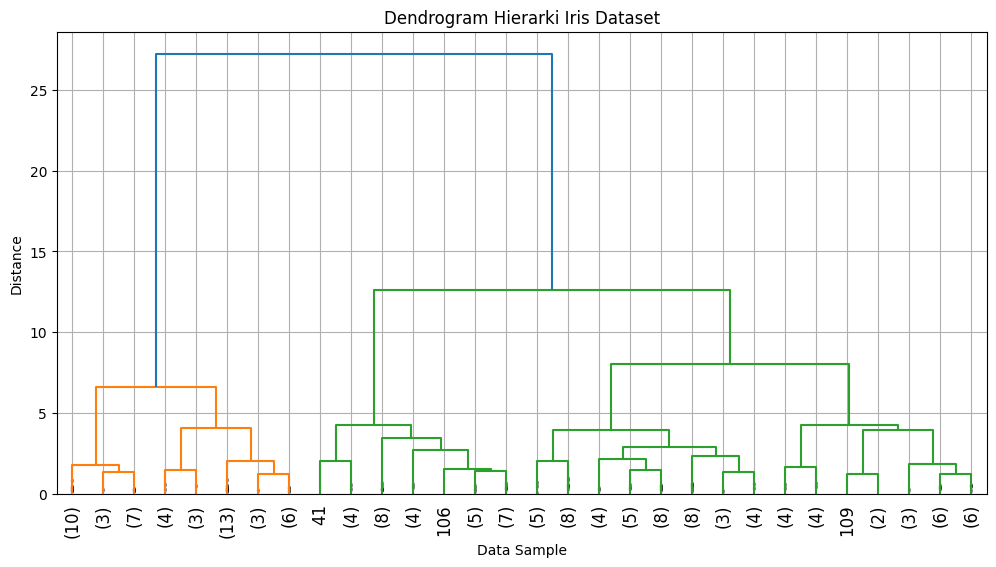

In [ ]:
# 6b. Visualisasi Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Gunakan linkage method ward
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Dendrogram Hierarki Iris Dataset")
plt.xlabel("Data Sample")
plt.ylabel("Distance")
plt.grid(True)
plt.show()